IMPORTING LIBRARIES NEEDED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READING CSV AND CHECKING NULL VALUES

In [2]:
df=pd.read_csv("BlackFriday.csv")
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

REMOVING NULL VALUED COLUMNS

In [3]:
del df["Product_Category_2"]
del df["Product_Category_3"]
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,23961.000000


ANALYSING COLUMNS USING UNIQUE() AND NUNIQUE()

In [4]:
print(df["User_ID"].nunique())
print(df["Product_ID"].nunique())
print(df["Gender"].unique())
print(df["Age"].unique())
print(df["Occupation"].nunique())
print(df["City_Category"].unique())
print(df["Stay_In_Current_City_Years"].unique())
print(df["Marital_Status"].unique())
print(df["Product_Category_1"].nunique())
print(df["Purchase"].nunique())
print()
for column in df.columns:
    print(column+" : ",df[column].nunique())

5891
3623
['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
21
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
18
17959

User_ID :  5891
Product_ID :  3623
Gender :  2
Age :  7
Occupation :  21
City_Category :  3
Stay_In_Current_City_Years :  5
Marital_Status :  2
Product_Category_1 :  18
Purchase :  17959


ANALYSING GENDER COLUMN USING DATAFRAME

In [5]:
gender=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]),len(df[df["Gender"]=="F"])]},index=["Male","Female"])
print(gender)

         Ratio
Male    405380
Female  132197


PLOTTING DATAFRAME IN PIE CHART

<Axes: ylabel='Ratio'>

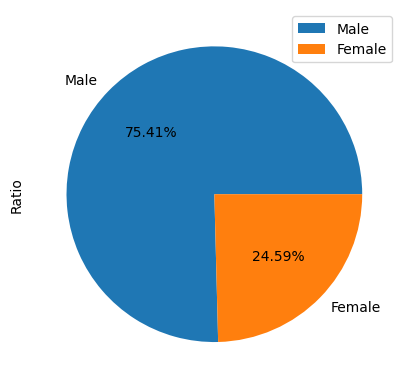

In [6]:
gender.plot.pie(y="Ratio",autopct="%.2f%%")

PLOTTING CSV INTO PIECHART USING GROUPBY()

size() returns the number of values in each group returned by groupby()

<Axes: >

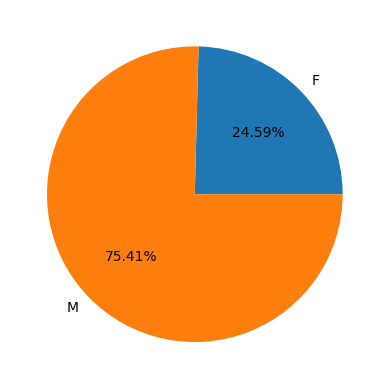

In [7]:
df.groupby("Gender").size().plot(kind="pie",autopct="%1.2f%%")

SELECTING COLUMN FROM GROUPS AND DOING ARITHMETIC OPERATION THEM AND PLOTTING IN THE END

sum()

WHAT IS THE TOTAL AMOUNT SPENT BY FEMALE/MALE?

<Axes: title={'center': 'Sales Ratio'}, ylabel='Purchase'>

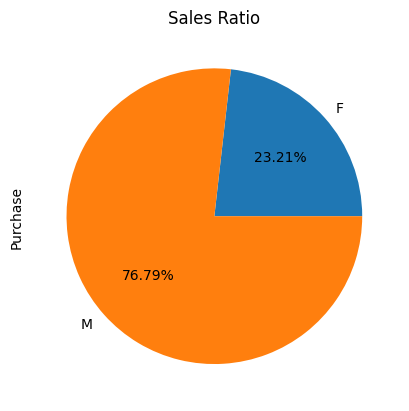

In [8]:
df.groupby("Gender")["Purchase"].sum().plot(kind="pie",autopct="%.2f%%",title="Sales Ratio")

mean()

WHAT IS THE AVERAGE AMOUNT SPENT BY MALE/FEMALE?

<Axes: title={'center': 'Sales Ratio'}, ylabel='Purchase'>

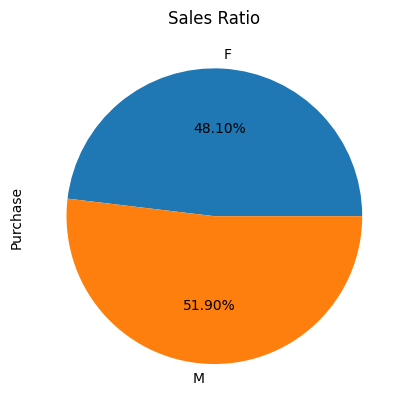

In [9]:
df.groupby("Gender")["Purchase"].mean().plot(kind="pie",autopct="%.2f%%",title="Sales Ratio")

GROUPING AGE COLUMN AND PLOTTING IT USING SIZE() AND PLOT()

pie:

HOW MANY PEOPLE ARE THERE IN EACH AGE CATEGORY?

<Axes: >

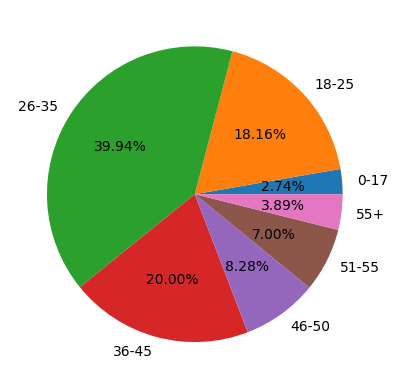

In [10]:
df.groupby("Age").size().plot(kind="pie",autopct="%1.2f%%")

bar:

<Axes: xlabel='Age'>

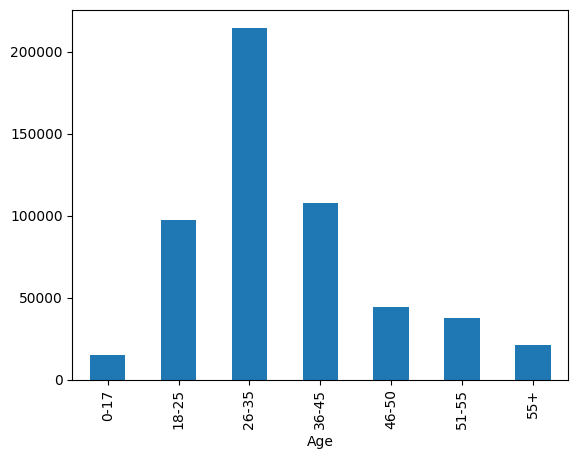

In [11]:
df.groupby("Age").size().plot(kind="bar")

SELECTING COLUMN FROM GROUPS AND DOING ARITHMETIC OPERATION THEM AND PLOTTING IN THE END

sum()

WHAT IS THE TOTAL AMOUNT SPENT BY EACH AGE CATEGORY?

pie:

<Axes: ylabel='Purchase'>

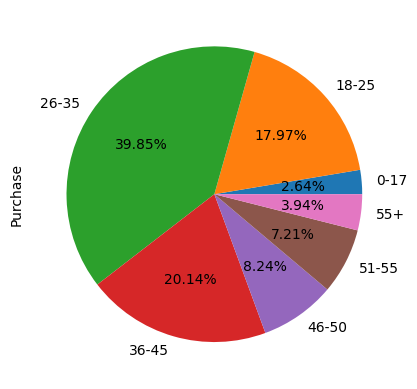

In [12]:
df.groupby("Age")["Purchase"].sum().plot(kind="pie",autopct="%1.2f%%")

bar:

<Axes: xlabel='Age'>

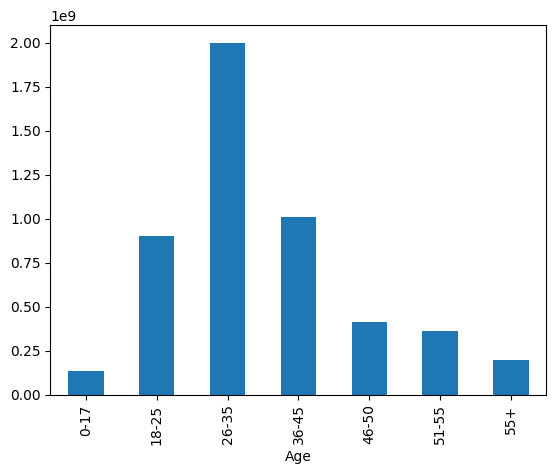

In [13]:
df.groupby("Age")["Purchase"].sum().plot(kind="bar")

mean()

WHAT IS THE AVERAGE AMOUNT SPENT BY EACH AGE CATEGORY?

pie:

<Axes: ylabel='Purchase'>

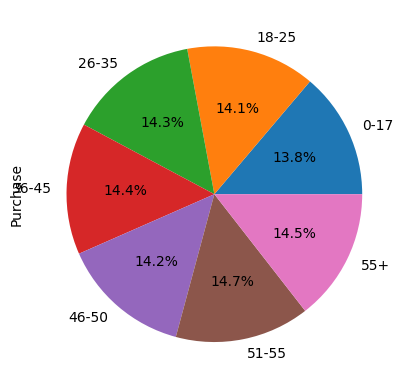

In [15]:
df.groupby("Age")["Purchase"].mean().plot(kind="pie",autopct="%1.1f%%")

bar:

<Axes: xlabel='Age'>

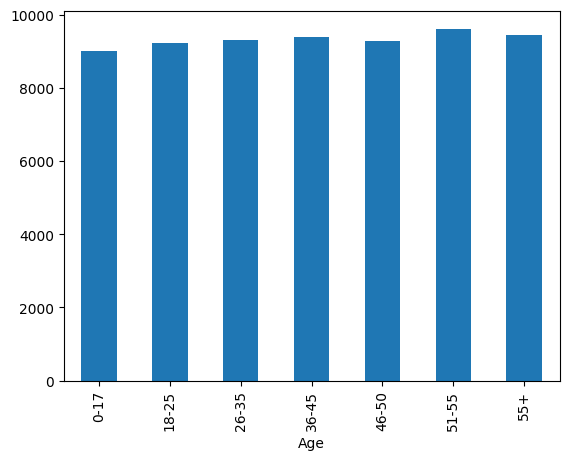

In [14]:
df.groupby("Age")["Purchase"].mean().plot(kind="bar")

GROUPING MARITAL_STATUS COLUMN AND PLOT IT USING SIZE() AND PLOT()

HOW MANY PEOPLE ARE MARRIED/UNMARRIED?

<Axes: >

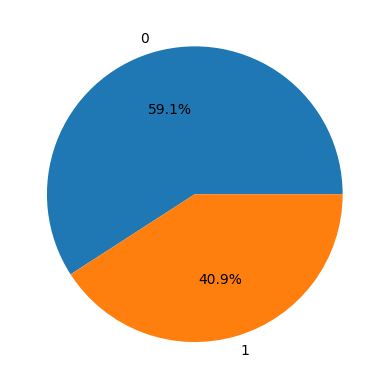

In [16]:
df.groupby("Marital_Status").size().plot(kind="pie",autopct="%1.1f%%")

MULTI COLUMN ANALYSIS USING LIST AND PLOTTING THEM

Empty list is created. loop runs for unique values of "Age". List is appended with a list that contains 2 values for every iteration of the loop. 
1st value is the unique value of "Age"
2nd value is unique number of products purchased by each "Age" group. this is done by  df[ df ["Age"]==i ["Product_ID"].nunique() ] 
This list is then converted into DataFrame and column names are set and then plotted

HOW MANY UNIQUE NUMBER OF PRODUCTS ARE PURCHASED BY EACH AGE CATEGORY?

<Axes: xlabel='Age'>

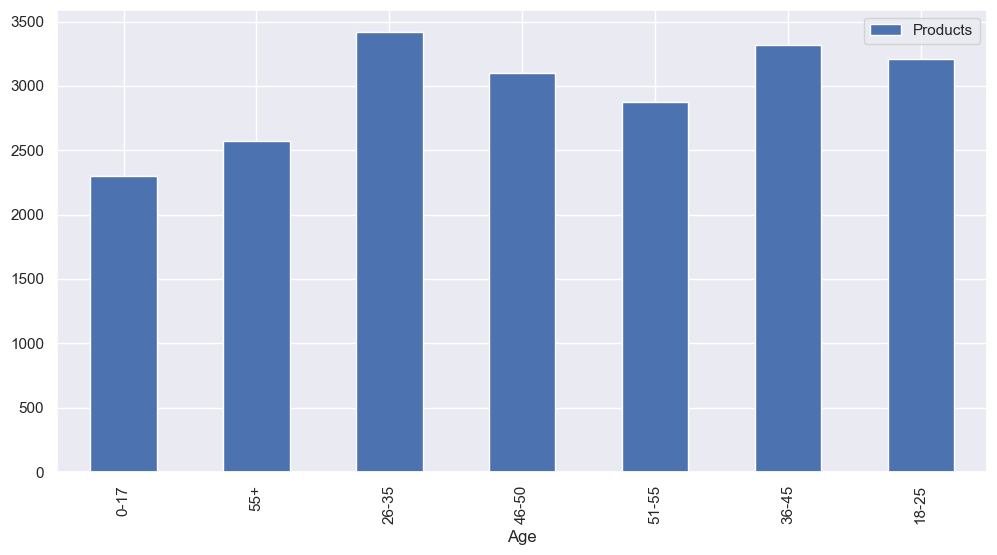

In [83]:
list=[]
for i in df["Age"].unique():
    list.append([i,df[df["Age"]==i]["Product_ID"].nunique()])
data=pd.DataFrame(list,columns=["Age","Products"])
data.plot.bar(x="Age")

MULTICOLUMN ANALYSIS USING SEABORN

set() is used to set the set of the plot. countplot is just like bar graph with hue="" to define 2nd column

COUNTPLOT BETWEEN AGE AND GENDER

HOW MANY FEMALES/MALES ARE THERE UNDER EACH AGE CATEGORY?

<Axes: xlabel='Age', ylabel='count'>

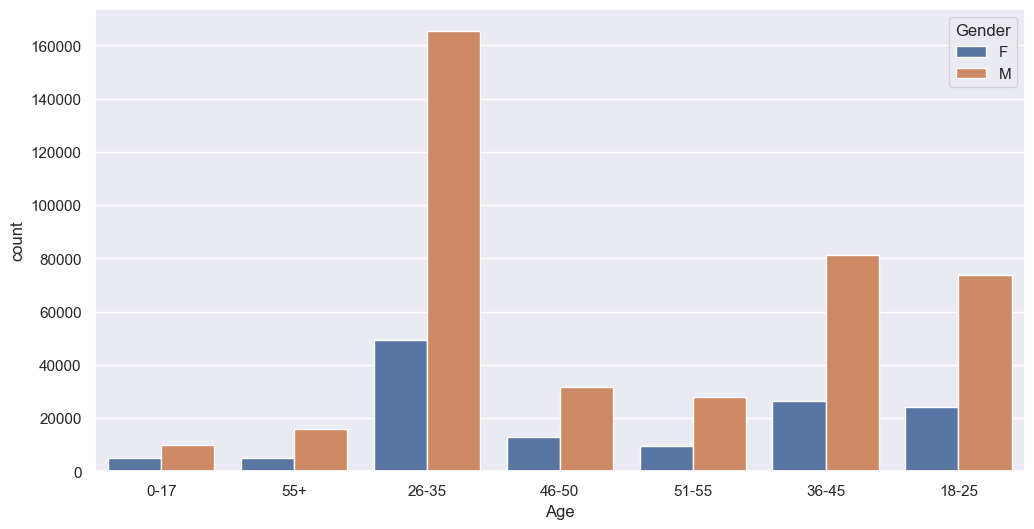

In [18]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(x="Age",hue="Gender",data=df)

COUNTPLOT BETWEEN GENDER AND AGE

<Axes: xlabel='Gender', ylabel='count'>

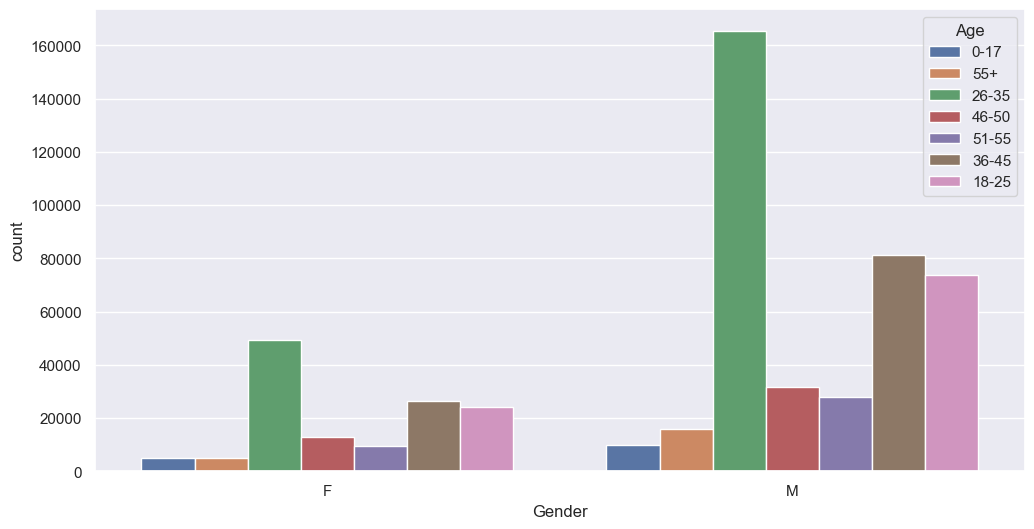

In [19]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(x="Gender",hue="Age",data=df)

COUNTPLOT BETWEEN GENDER AND MARITAL_STATUS

HOW MANY FEMALES/MALES ARE MARRIED OR UNMARRIED?

<Axes: xlabel='Gender', ylabel='count'>

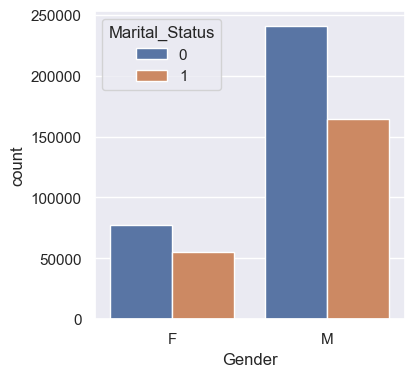

In [20]:
sns.set(rc={"figure.figsize":(4,4)})
sns.countplot(x="Gender",hue="Marital_Status",data=df)

COUNTPLOT FOR CITY_CATEGORY (SINGLE COLUMN)

HOW MANY NUMBER OF PEOPLE LIVE IN EACH CITY?

<Axes: xlabel='City_Category', ylabel='count'>

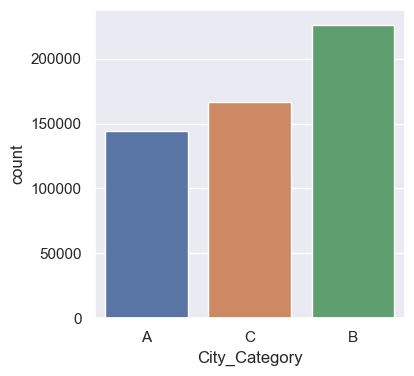

In [21]:
sns.countplot(x="City_Category",data=df)

COUNTPLOT BETWEEN CITY_CATEGORY AND AGE

HOW MANY PEOPLE OF EACH AGE CATEGORY LIVE IN EACH CITY?

<Axes: xlabel='City_Category', ylabel='count'>

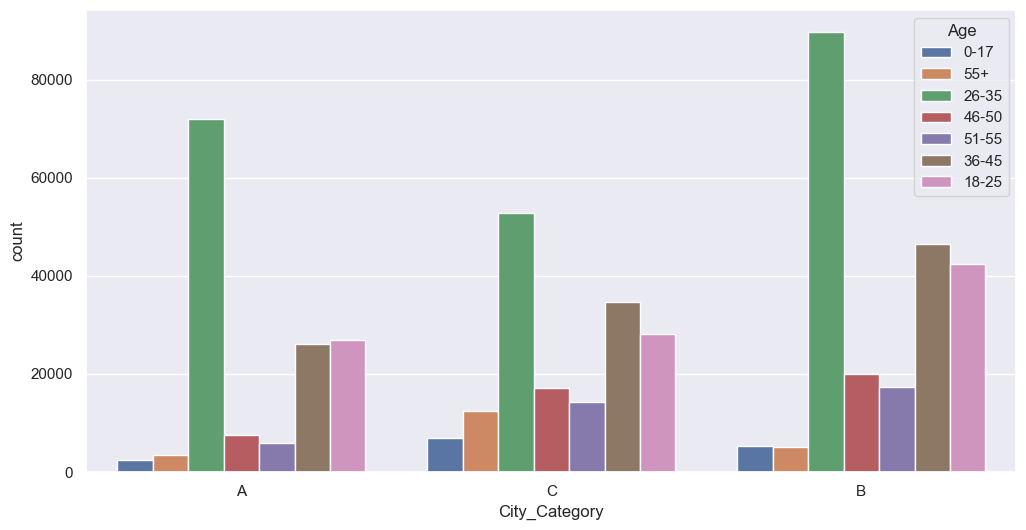

In [22]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(x="City_Category",hue="Age",data=df)

COUNTPLOT BETWEEN CITY_CATEGORY AND GENDER

HOW MANY FEMALE/MALE LIVES IN EACH CITY?

<Axes: xlabel='City_Category', ylabel='count'>

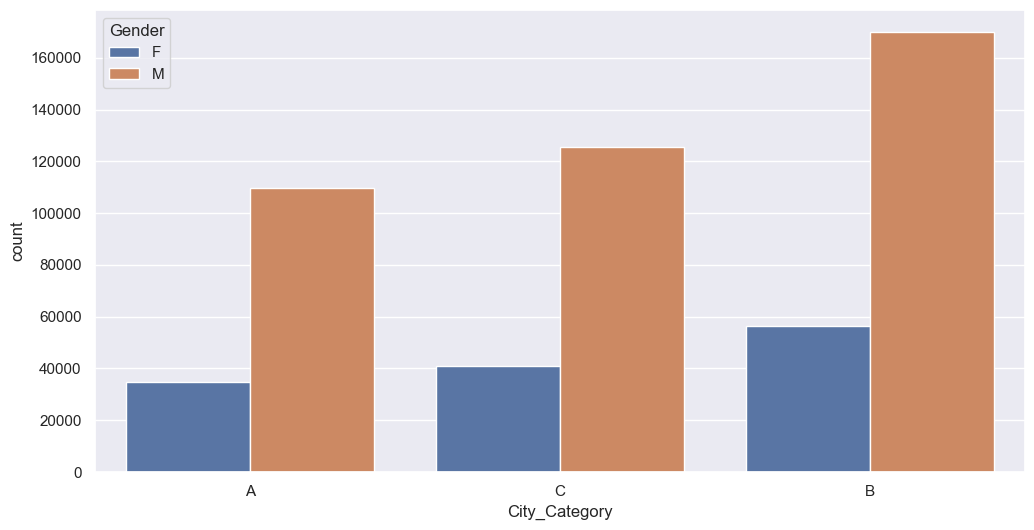

In [23]:
sns.countplot(x="City_Category",hue="Gender",data=df)

COUNTPLOT BETWEEN MARITAL_STATUS AND CITY CATEGORY

HOW MANY MARRIED OR UNMARRIED PEOPLE LIVE IN EACH CITY?

<Axes: xlabel='Marital_Status', ylabel='count'>

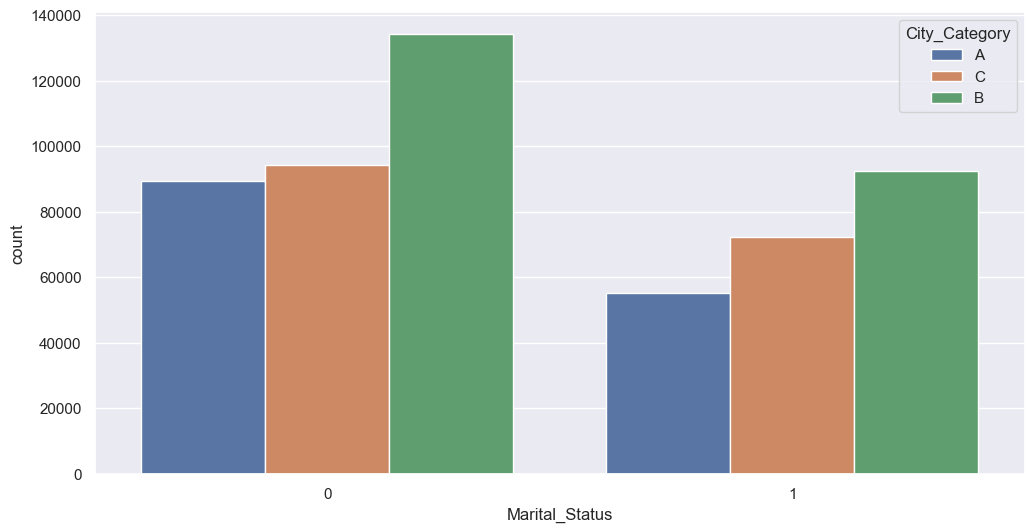

In [24]:
sns.countplot(x="Marital_Status",hue="City_Category",data=df)

OCCUPATION AND PRODUCT ANALYSIS

COUNTPLOT OF STAY_IN_CURRENT_CITY_YEARS

HOW MANY NUMBER OF PEOPLE LIVING IN THE CURRENT CITY FOR ___YEARS?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

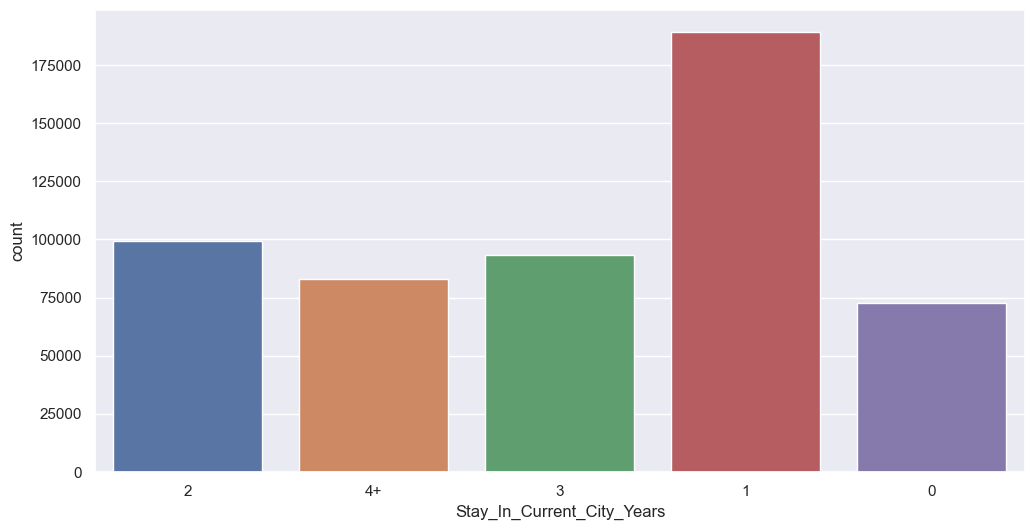

In [33]:
sns.countplot(x="Stay_In_Current_City_Years",data=df)

SAME DONE BY USING GROUPBY() AND PLOT(KIND="BAR")

<Axes: xlabel='Stay_In_Current_City_Years'>

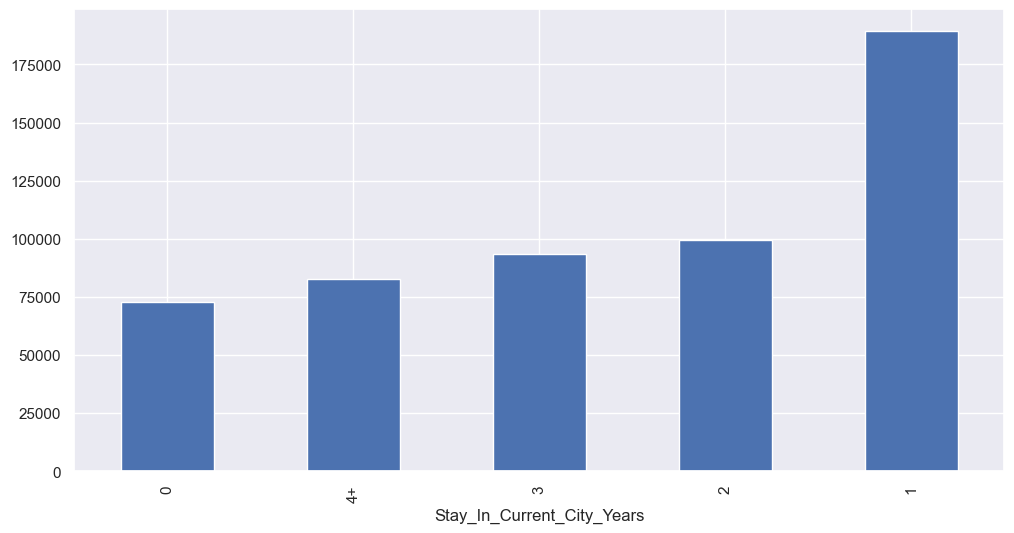

In [32]:
df.groupby("Stay_In_Current_City_Years").size().sort_values().plot(kind="bar")

HOW MANY NUMBER OF FEMALE/MALE LIVES ____ YEARS IN THE CURRENT CITY?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

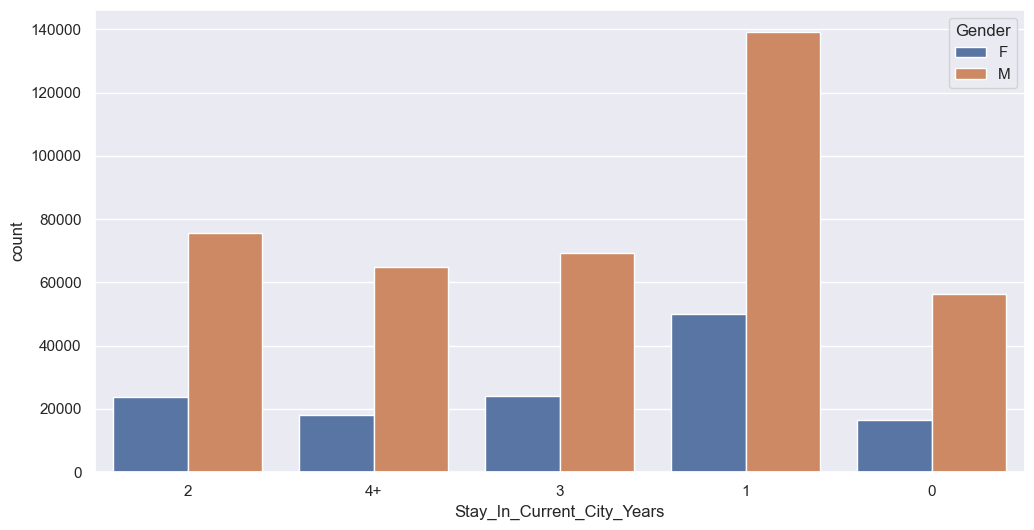

In [34]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender",data=df)

HOW MANY NUMBER OF MARRIED/UNMARRIEDD PEOPLE LIVES ____ YEARS IN THE CURRENT CITY?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

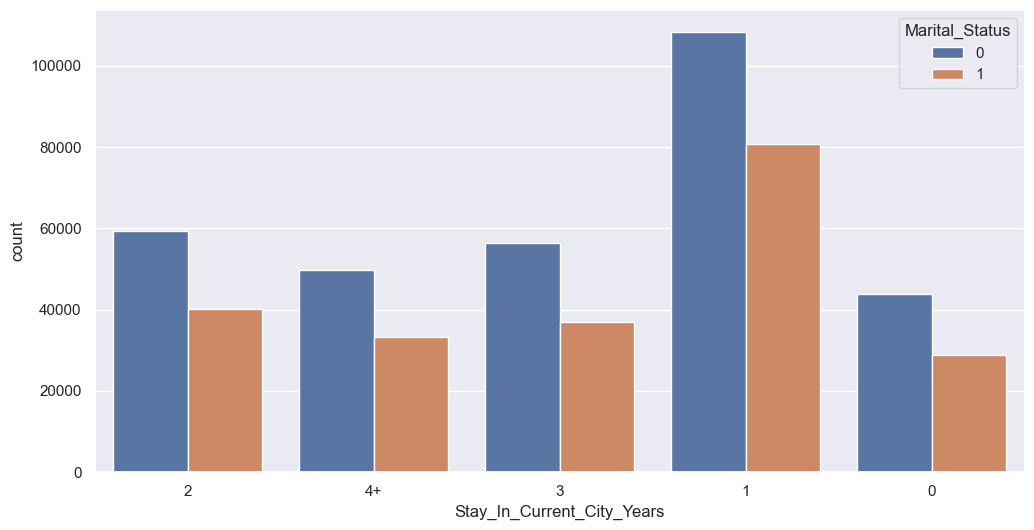

In [35]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Marital_Status",data=df)

HOW MANY NUMBER OF PEOPLE LIVING IN THE CITIES LIVED THERE FOR ____ YEARS?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

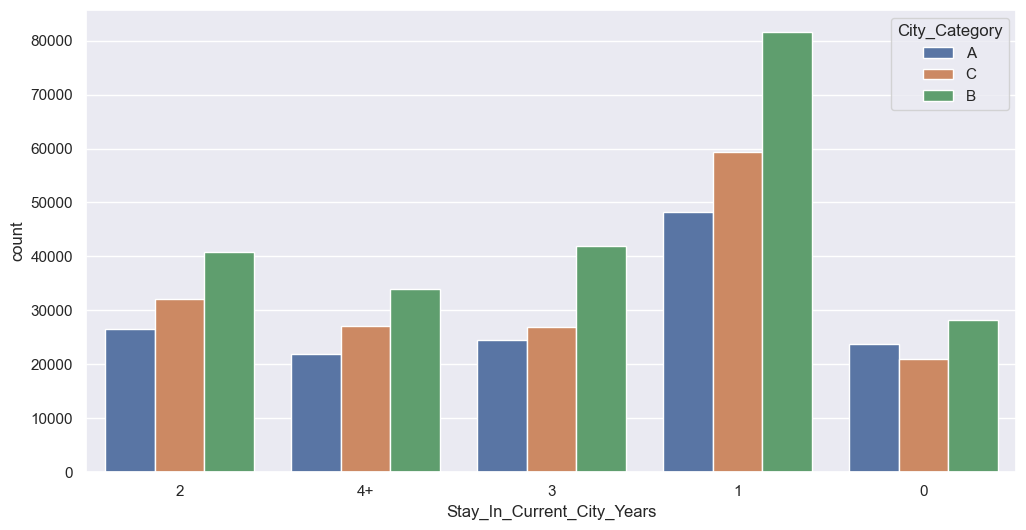

In [36]:
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",data=df)

HOW MANY PEOPLE ARE UNDER EACH AGE GROUP IN EACH CITY?

<Axes: xlabel='City_Category', ylabel='count'>

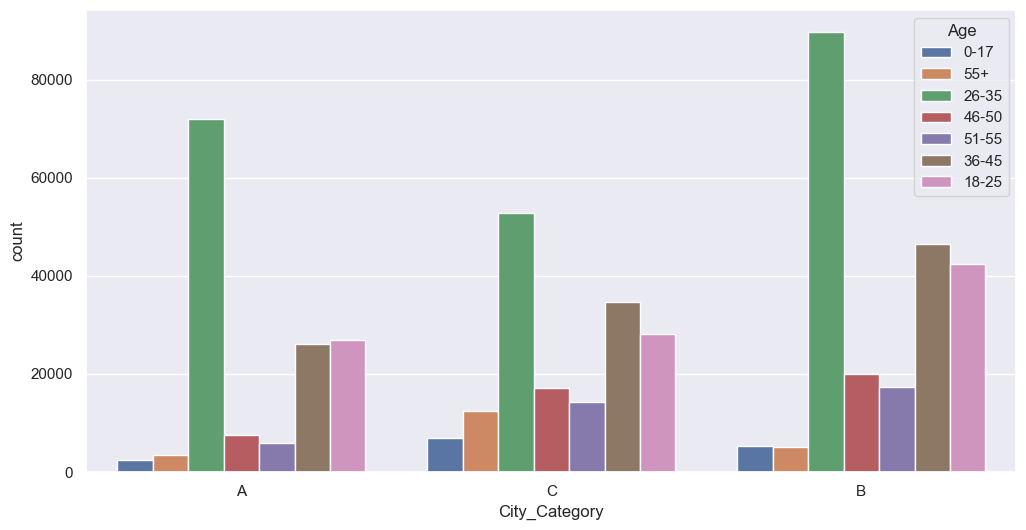

In [37]:
sns.countplot(x="City_Category",hue="Age",data=df)

WHAT THE TOTAL AMOUNT SPENT BY PEOPLE WHO LIVED IN THE SAME CITY FOR ____ YEARS?

<Axes: xlabel='Stay_In_Current_City_Years'>

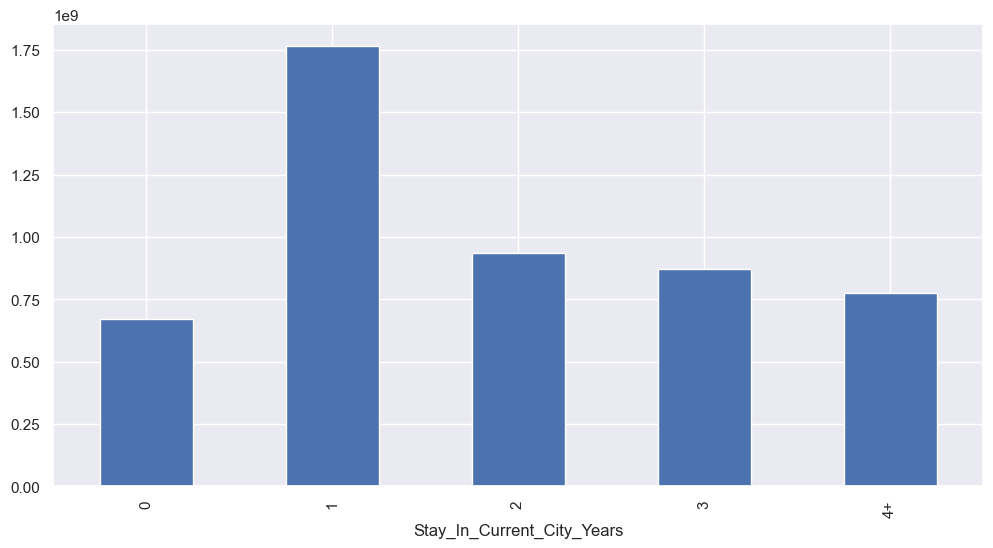

In [40]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind="bar")

WHAT IS THE AVERAGE AMOUNT SPENT BY PEOPLE WHO LIVED IN THE SAME CITY FOR ____ YEARS?

<Axes: xlabel='Stay_In_Current_City_Years'>

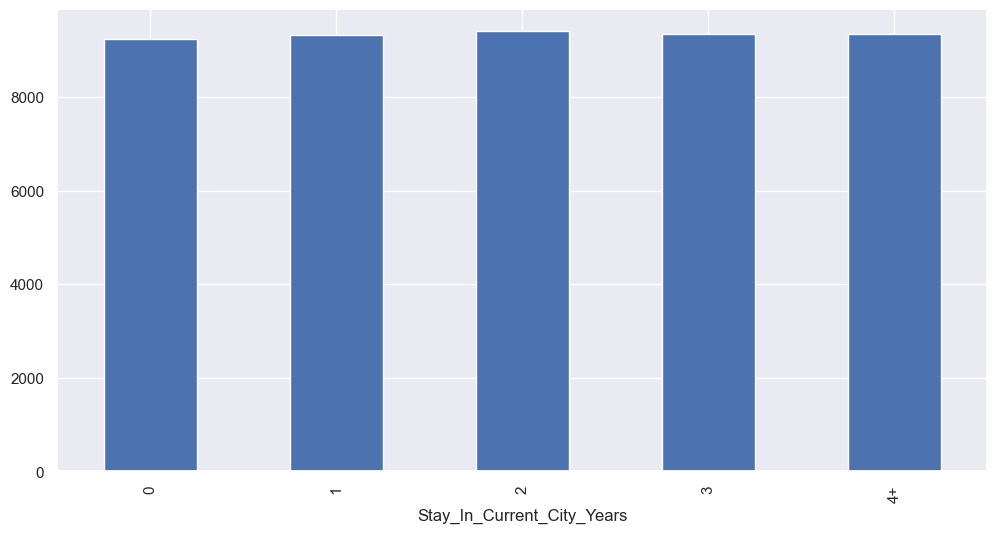

In [41]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind="bar")

COUNTPLOT OF OCCUPATION

<Axes: xlabel='Occupation', ylabel='count'>

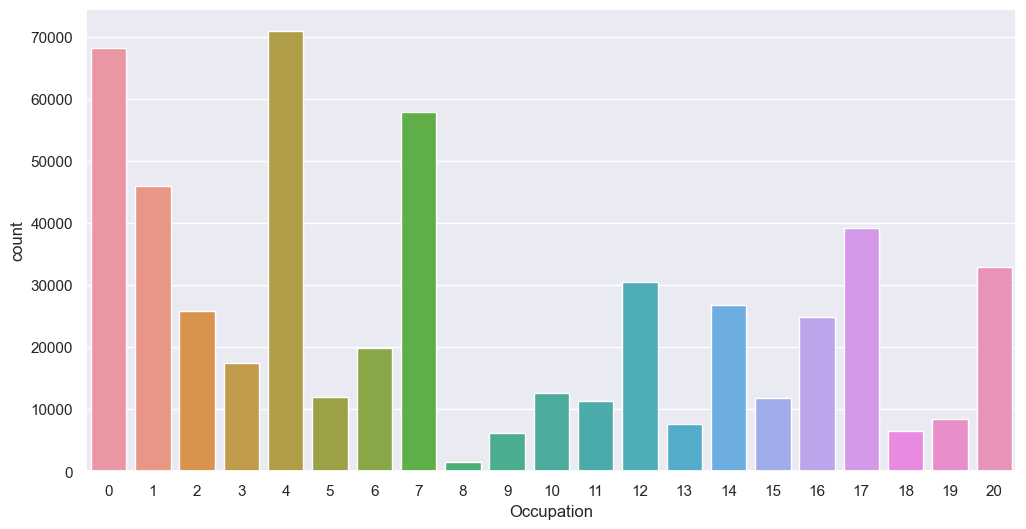

In [42]:
sns.countplot(x="Occupation",data=df)

HOW MANY NUMBER OF PEOPLE ARE WORKING IN EACH OCCUPATION?

<Axes: xlabel='Occupation'>

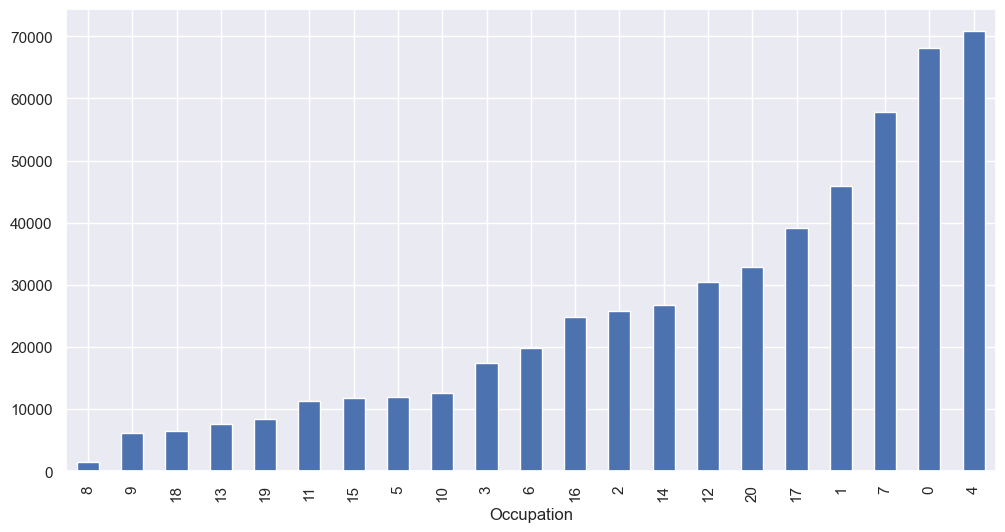

In [43]:
df.groupby("Occupation").size().sort_values().plot(kind="bar")

WHAT IS THE TOTAL AMOUNT OF PURCHASE DONE BY PEOPLE IN EACH OCCUPATION?

<Axes: xlabel='Occupation'>

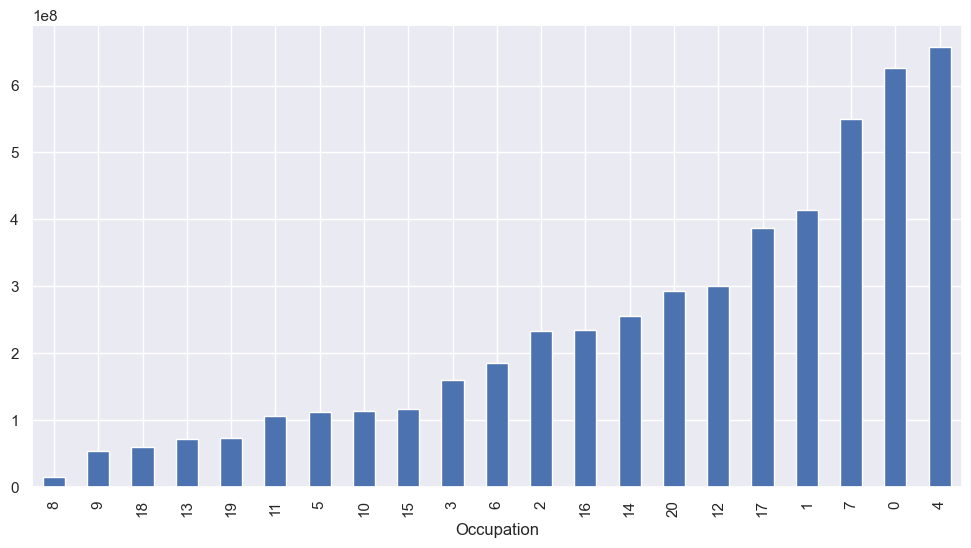

In [44]:
df.groupby("Occupation")["Purchase"].sum().sort_values().plot(kind="bar")

WHAT IS THE AVERAGE AMOUNT OF PURCHASE DONE BY PEOPLE IN EACH OCCUPATION?

<Axes: xlabel='Occupation'>

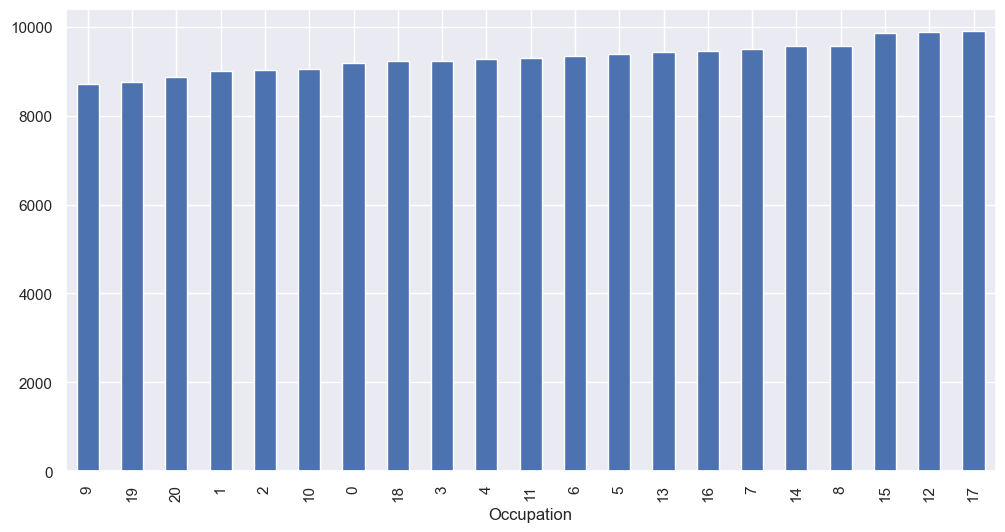

In [45]:
df.groupby("Occupation")["Purchase"].mean().sort_values().plot(kind="bar")

HOW MANY PEOPLE ARE MARRIED/UNMARRIED IN EACH OCCUPATION?

<Axes: xlabel='Occupation', ylabel='count'>

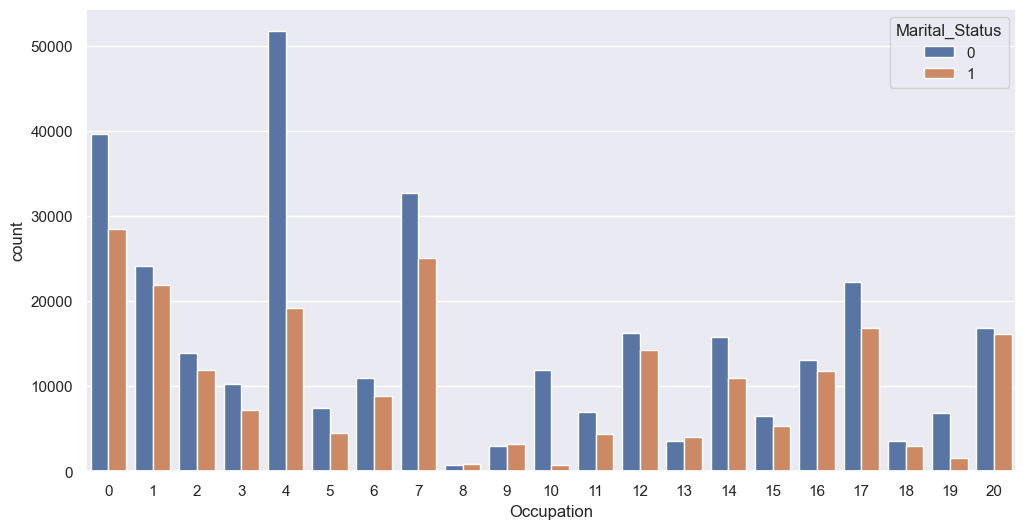

In [46]:
sns.countplot(x="Occupation",hue="Marital_Status",data=df)

HOW MANY FEMALES AND MALES ARE WORKING IN EACH OCCUPATION?

<Axes: xlabel='Occupation', ylabel='count'>

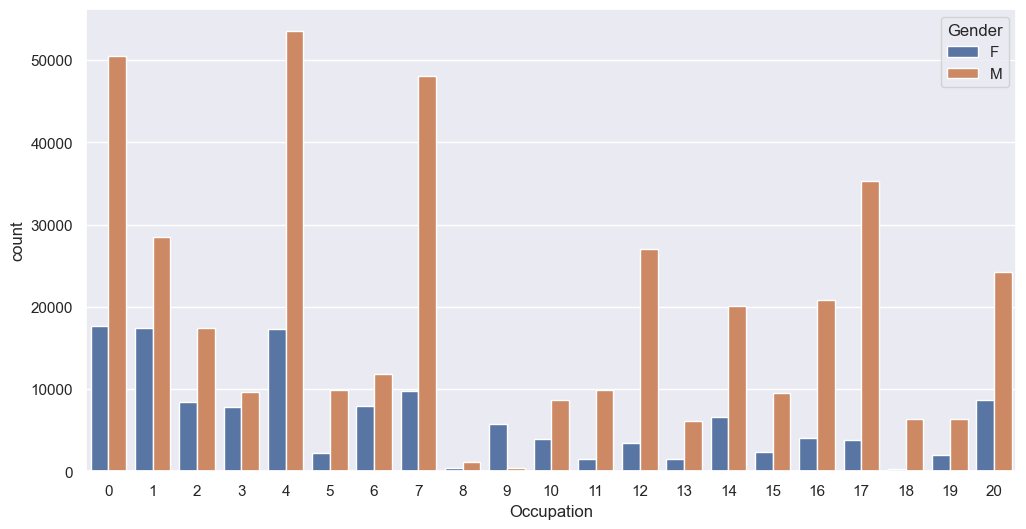

In [47]:
sns.countplot(x="Occupation",hue="Gender",data=df)

HOW MANY UNIQUE PRODUCTS ARE PURCHASED BY PEOPLE IN EACH OCCUPATION?

<Axes: xlabel='Occupation'>

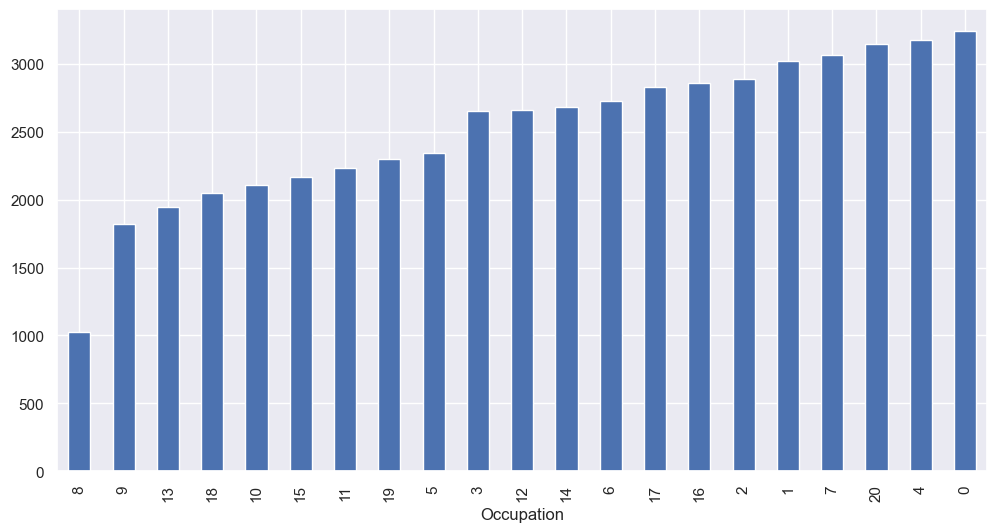

In [48]:
df.groupby("Occupation")["Product_ID"].nunique().sort_values().plot(kind="bar")

COUNTPLOT OF PRODUCT_CATEGORY_1

<Axes: xlabel='Product_Category_1', ylabel='count'>

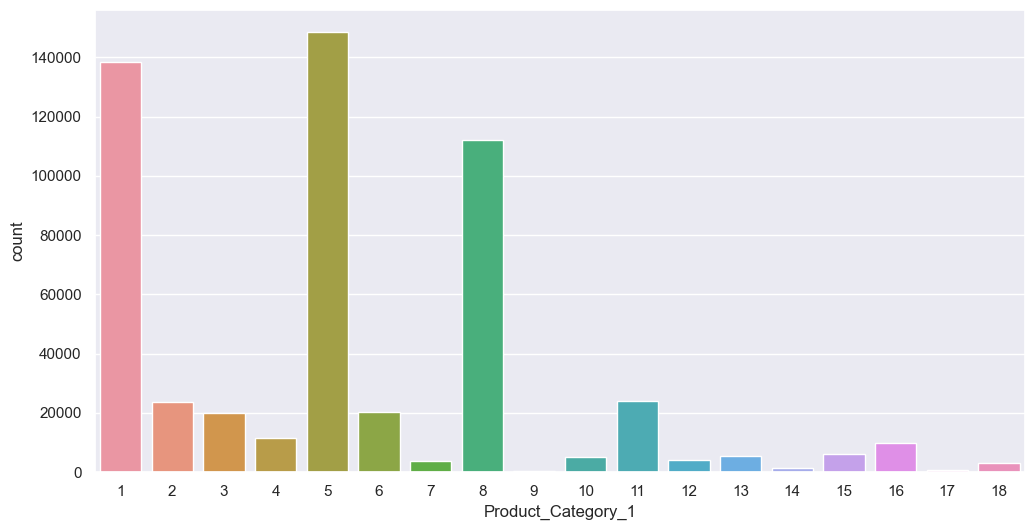

In [51]:
sns.countplot(x="Product_Category_1",data=df)

HOW MANY NUMBER OF PRODUCTS ARE AVAILABLE IN EACH PRODUCT OF PRODUCT_CATEGORY_1?

<Axes: xlabel='Product_Category_1'>

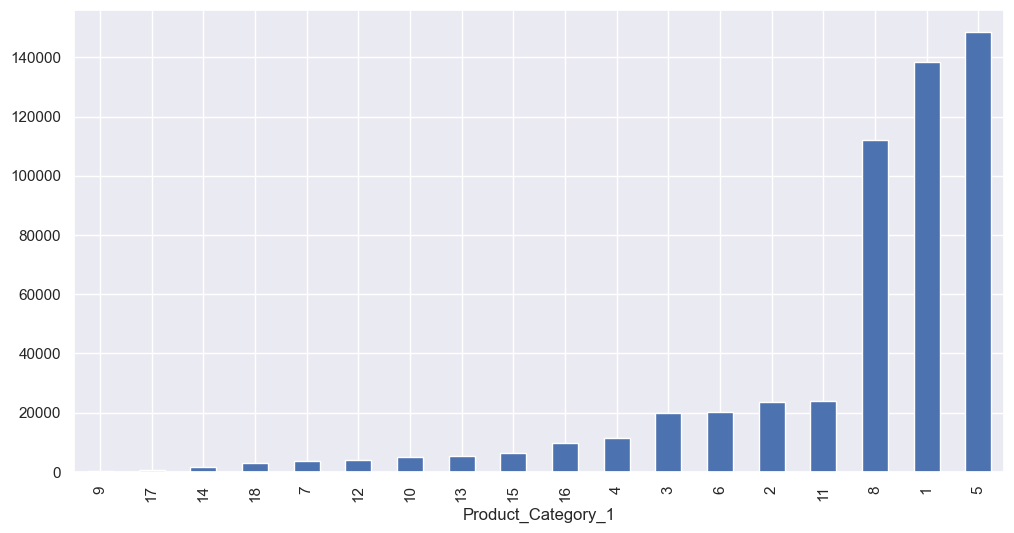

In [53]:
df.groupby("Product_Category_1").size().sort_values().plot(kind="bar")

WHAT IS THE TOTAL AMOUNT OF PURCHASE DONE ON EACH PRODUCT IN PRODUCT_CATEGORY_1?

<Axes: xlabel='Product_Category_1'>

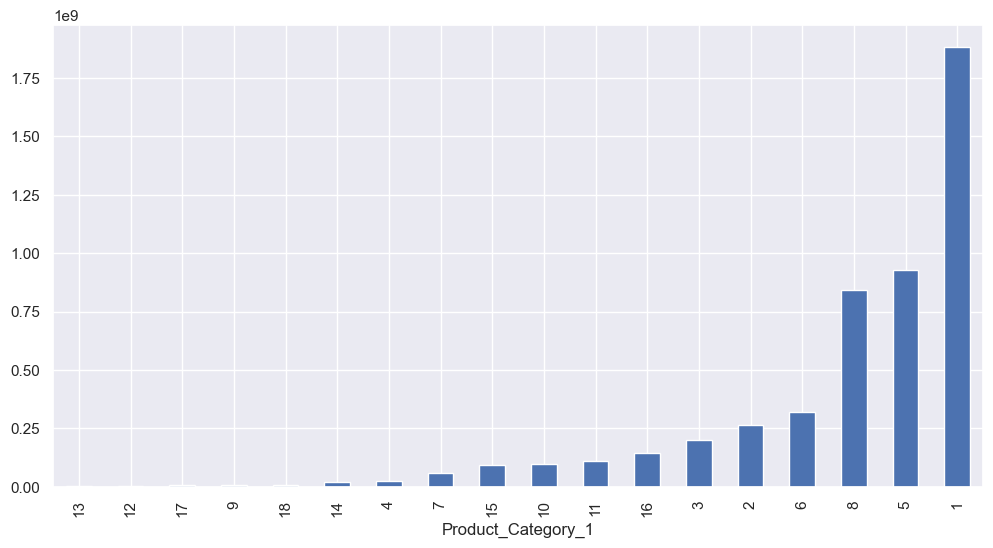

In [54]:
df.groupby("Product_Category_1")["Purchase"].sum().sort_values().plot(kind="bar")

WHAT IS AVERAGE AMOUNT OF EACH PRODUCT IN PRODUCT_CATEGORY_1?

<Axes: xlabel='Product_Category_1'>

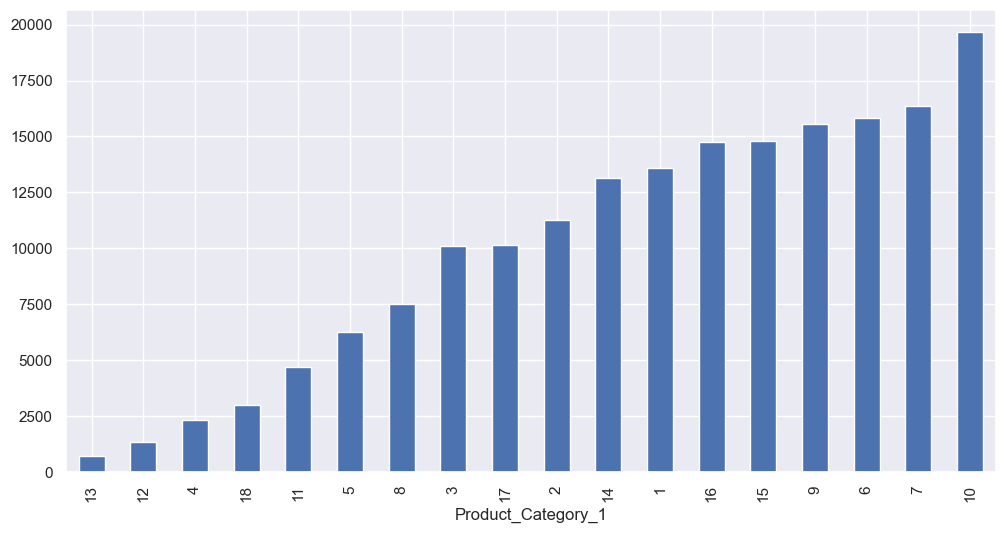

In [55]:
df.groupby("Product_Category_1")["Purchase"].mean().sort_values().plot(kind="bar")

HOW MANY PRODUCTS ARE PURCHASED IN THE TOP 10 SOLD PRODUCTS?

<Axes: xlabel='Product_ID'>

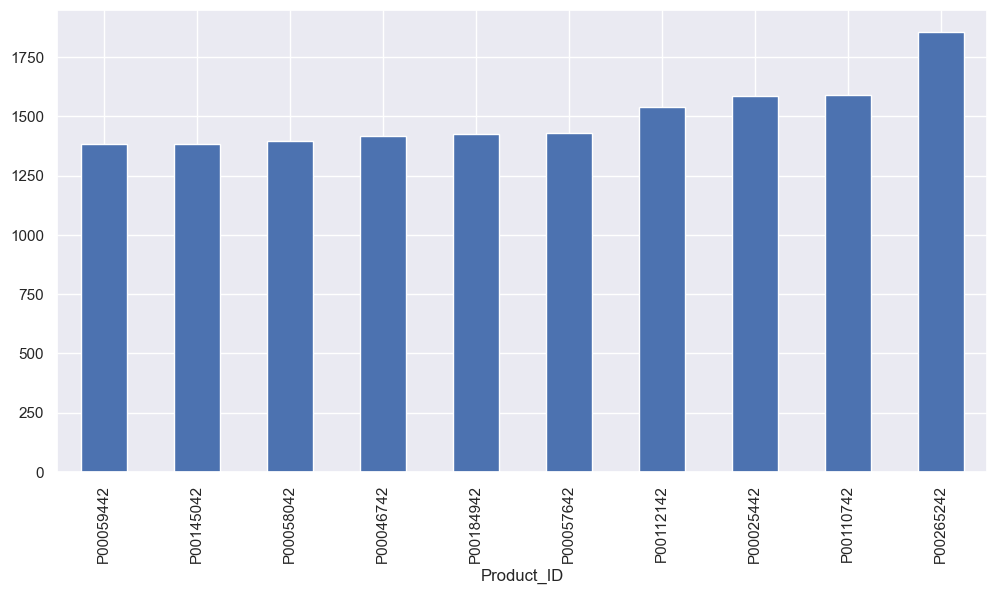

In [57]:
df.groupby("Product_ID").size().nlargest(10).sort_values().plot(kind="bar")

WHAT ARE THE TOP 10 HIGHEST REVENUE GENERATED PRODUCTS AND HOW MUCH DID IT GENERATE?

<Axes: xlabel='Product_ID'>

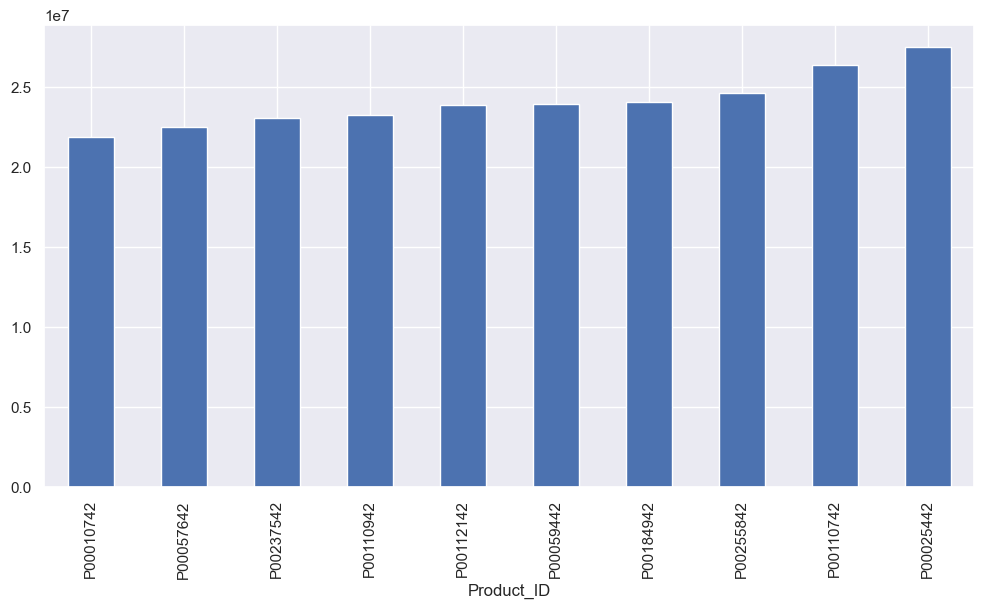

In [56]:
df.groupby("Product_ID")["Purchase"].sum().nlargest(10).sort_values().plot(kind="bar")

WHAT ARE THE TOP 10 HIGHEST AVERAGE REVENUE GENERATED PRODUCTS AND HOW MUCH IS THE AVERAGE REVENUE GENERATED BY THEM?

<Axes: xlabel='Product_ID'>

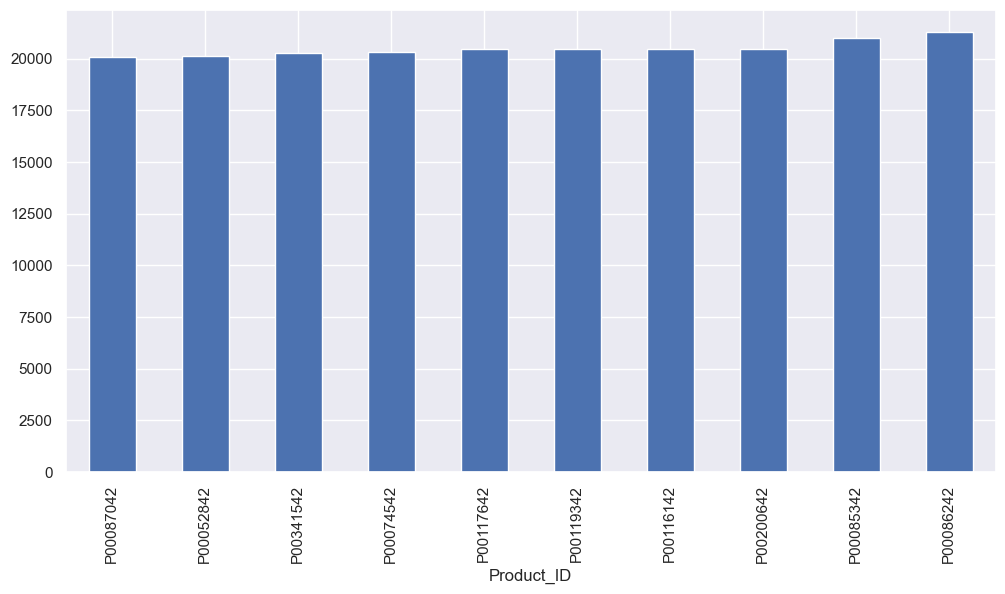

In [58]:
df.groupby("Product_ID")["Purchase"].mean().nlargest(10).sort_values().plot(kind="bar")

HOW MANY FEMALES/MALES BUY THE PRODUCTS UNDER PRODUCT_CATEGORY_1?

<Axes: xlabel='Product_Category_1', ylabel='count'>

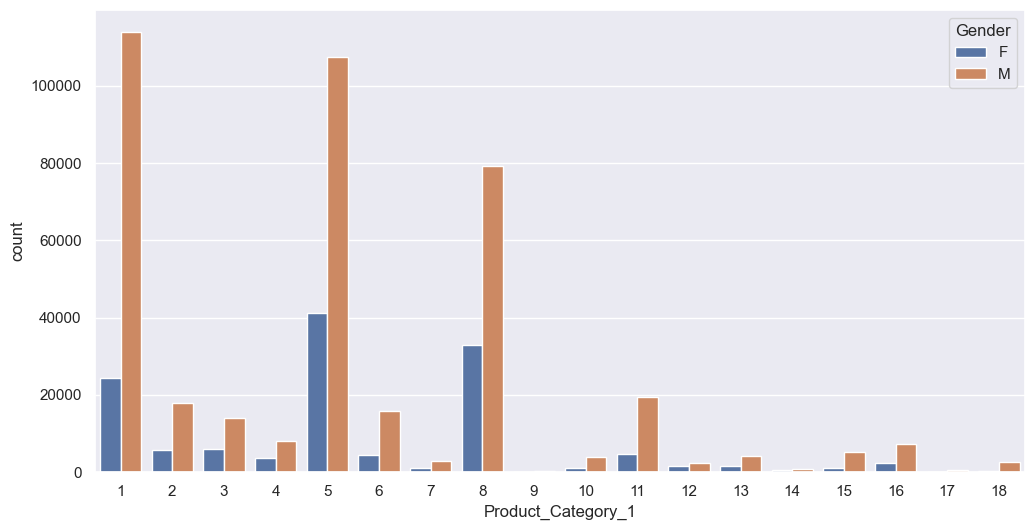

In [59]:
sns.countplot(x="Product_Category_1",hue="Gender",data=df)

HOW MANY MARRIED/UNMARRIED BUY THE PRODUCTS UNDER PRODUCT_CATEGORY_1?

<Axes: xlabel='Product_Category_1', ylabel='count'>

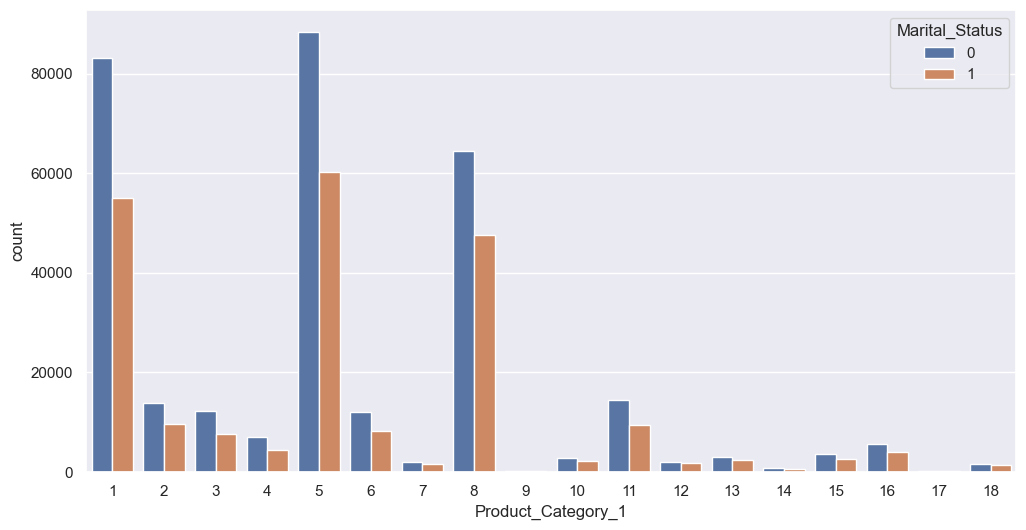

In [60]:
sns.countplot(x="Product_Category_1",hue="Marital_Status",data=df)

COMBINING AGE AND MARITAL STATUS

BEFORE

In [61]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


AFTER

In [73]:
l=[]
for i in range(len(df)):
    l.append(df["Gender"][i]+"_"+str(df["Marital_Status"][i]))
df["GenderMarital"]=l
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,GenderMarital
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


COUNTPLOT OF THE NEWLY GENERATED GENDERMARITAL COLUMN

<Axes: xlabel='GenderMarital', ylabel='count'>

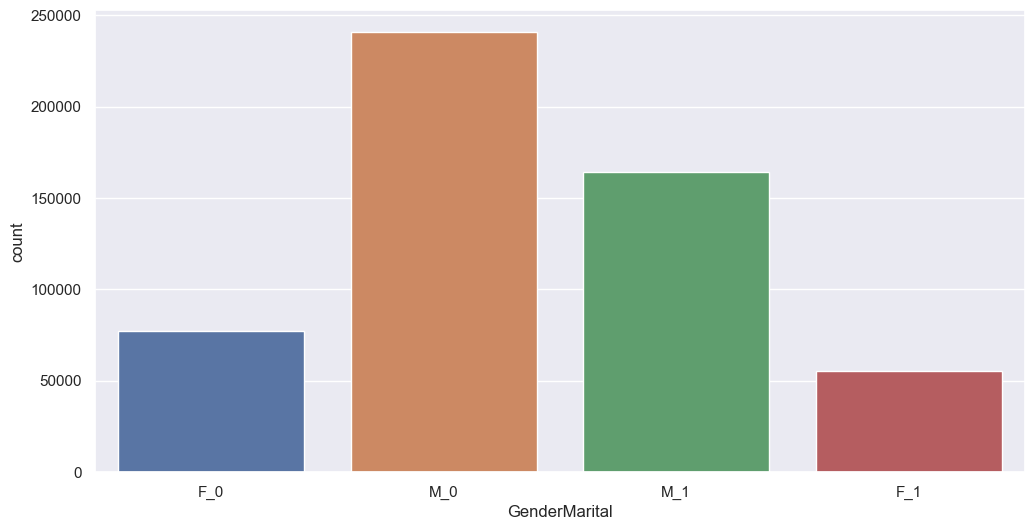

In [75]:
sns.countplot(x="GenderMarital",data=df)

HOW MANY PEOPLE OF EACH AGE CATEGORY ARE MALE AND UNMARRIED, MALE AND MARRIED, FEMALE AND UNMARRIED, FEMALE AND MARRIED?

<Axes: xlabel='Age', ylabel='count'>

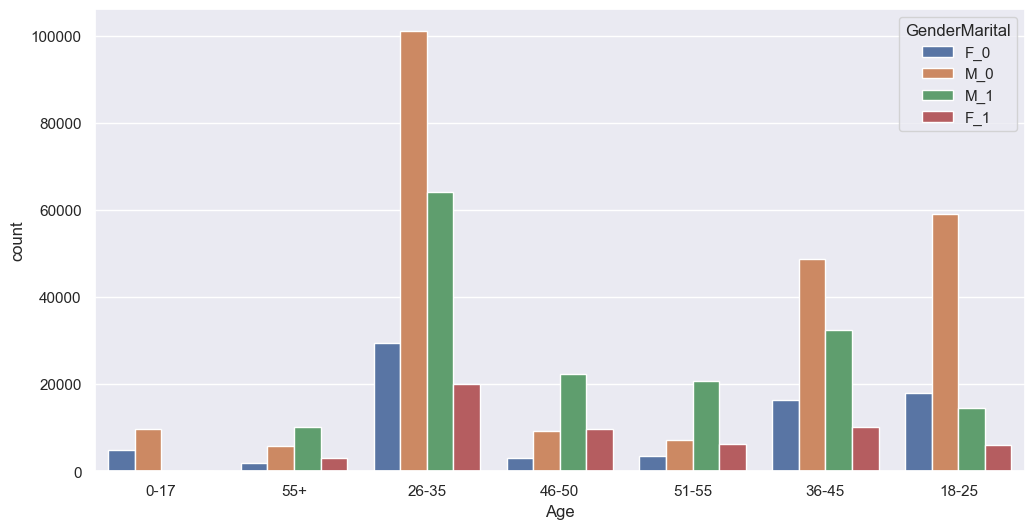

In [76]:
sns.countplot(x="Age",hue="GenderMarital",data=df)

HOW MANY PRODUCTS IN EACH PRODUCT OF PRODUCT_CATEGORY_1 ARE PURCHASED BY MALE AND UNMARRIED, MALE AND MARRIED, FEMALE AND UNMARRIED, FEMALE AND MARRIED?

<Axes: xlabel='Product_Category_1', ylabel='count'>

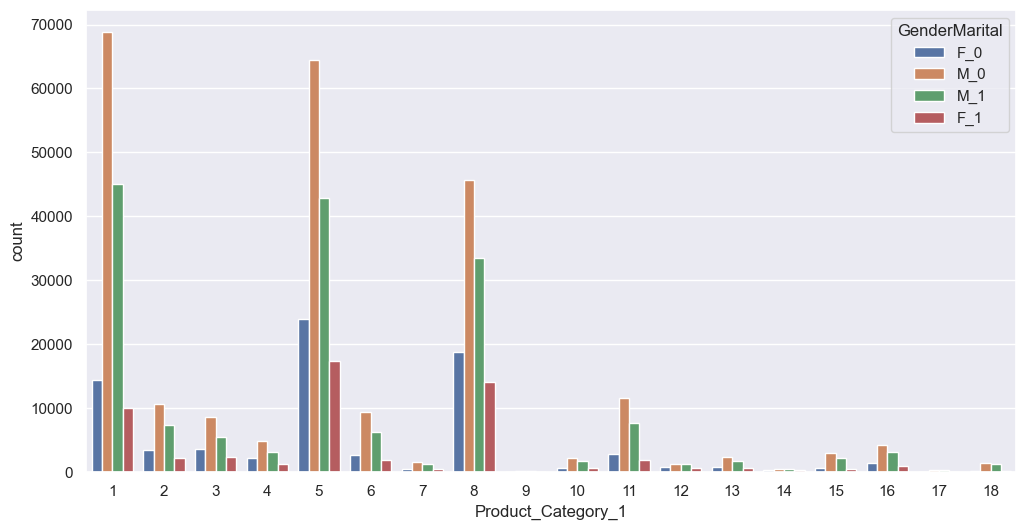

In [77]:
sns.countplot(x="Product_Category_1",hue="GenderMarital",data=df)

HOW MANY MALE AND UNMARRIED, MALE AND MARRIED, FEMALE AND UNMARRIED, FEMALE AND MARRIED PEOPLE LIVED ____ YEARS IN THE CURRENT CITY?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

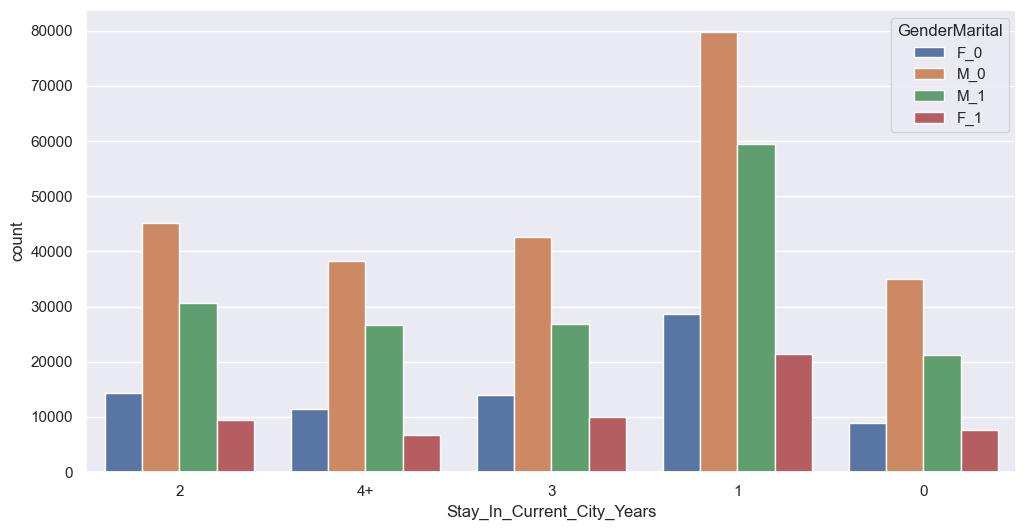

In [78]:
sns.countplot(x="Stay_In_Current_City_Years",hue="GenderMarital",data=df)

HOW MANY MALE AND UNMARRIED, MALE AND MARRIED, FEMALE AND UNMARRIED, FEMALE AND MARRIED PEOPLE ARE IN EACH CITY?

<Axes: xlabel='City_Category', ylabel='count'>

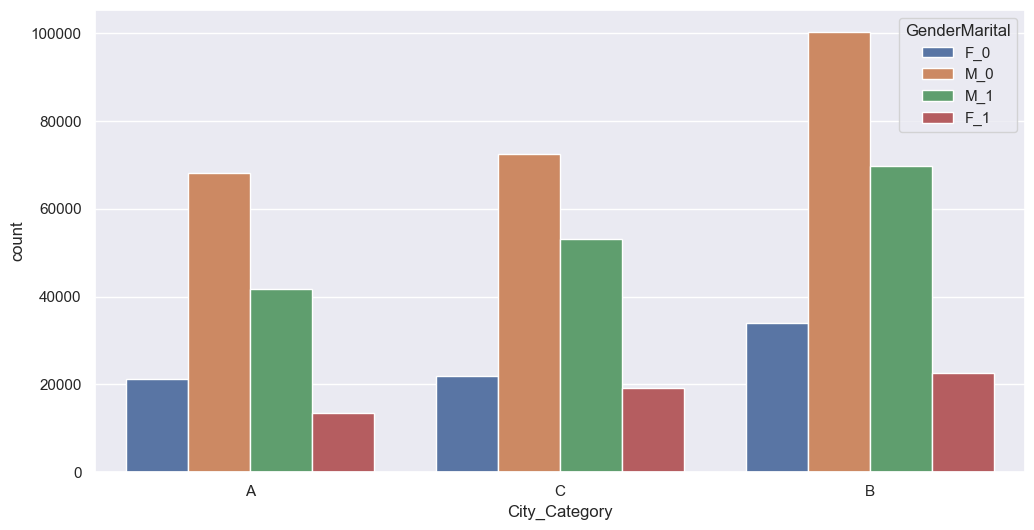

In [79]:
sns.countplot(x="City_Category",hue="GenderMarital",data=df)